In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import plotting
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
#import and save data
path='/Users/mansikhanna/Downloads/Mall_Customers.csv'
#path='/Users/wenting/Documents/A-Algorithmic Machine Learning/Team Project/Mall_Customers.csv'
df = pd.read_csv(path)
df = pd.DataFrame(df)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [26]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [27]:
#data preparation
numerical_features=['Annual Income (k$)','Spending Score (1-100)']
#Standdard Scaling
dat=df
dat[numerical_features]=MinMaxScaler().fit_transform(df[numerical_features])
#drop data
dat = pd.DataFrame(dat.drop(['CustomerID'], axis=1))

In [28]:
print(dat.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000            0.373443                0.502041
std     13.969007            0.215285                0.263505
min     18.000000            0.000000                0.000000
25%     28.750000            0.217213                0.344388
50%     36.000000            0.381148                0.500000
75%     49.000000            0.516393                0.734694
max     70.000000            1.000000                1.000000


/Users/mansikhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hist for Age')

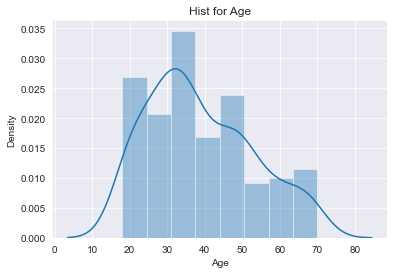

In [29]:
# Data visualization
sns.distplot(dat['Age']).set_title("Hist for Age")

In [30]:
age_group = pd.cut(dat['Age'], bins = [18,28,38,48,58,68,78], labels= ['18-27','28-37','38-47','48-57','58-67','68+'])
dat.insert(4, 'Age_Group', age_group)
dat.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group
136,Female,44,0.475410,0.061224,38-47
68,Male,19,0.270492,0.591837,18-27
124,Female,23,0.450820,0.285714,18-27
44,Female,49,0.196721,0.275510,48-57
107,Male,54,0.393443,0.459184,48-57
75,Male,26,0.319672,0.540816,18-27
26,Female,45,0.106557,0.316327,38-47
179,Male,35,0.639344,0.908163,28-37
80,Male,57,0.319672,0.510204,48-57
128,Male,59,0.459016,0.102041,58-67


/Users/mansikhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mansikhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


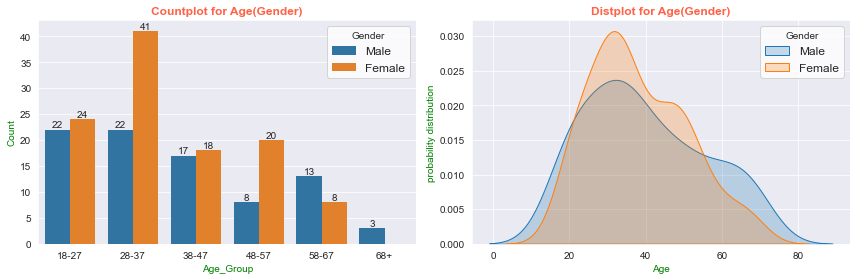

In [31]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

ax = sns.countplot(x='Age_Group', hue='Gender', data=dat, edgecolor="None", ax=axs[0])
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)

for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2.
    y = rect.get_height()
    ax.annotate(f"{y:.0f}", (x, y), ha='center', va='bottom', clip_on=True)

ax.set_xlabel('Age_Group', color='green')
ax.set_ylabel('Count', color='green')
ax.set_title('Countplot for Age(Gender)', color='tomato', weight='bold')
ax.legend(title='Gender', fontsize='large', loc='upper right').get_frame().set_facecolor('white')

for gender in ('Male','Female'):
    #ax2 = sns.kdeplot(dat[dat['Gender'] == 1]['Age'], shade=True, ax=axs[1], label=gender)
    ax2 = sns.distplot(dat[dat['Gender'] == gender]['Age'], hist=False, kde_kws={'shade': True}, ax=axs[1], label=gender)

ax2.set_axisbelow(True)
ax2.set_xlabel('Age', color='green')
ax2.set_ylabel('probability distribution', color='green')
ax2.set_title('Distplot for Age(Gender)', color='tomato', weight='bold')
ax2.legend(title='Gender', fontsize='large', loc='upper right').get_frame().set_facecolor('white')

plt.tight_layout()

plt.show()

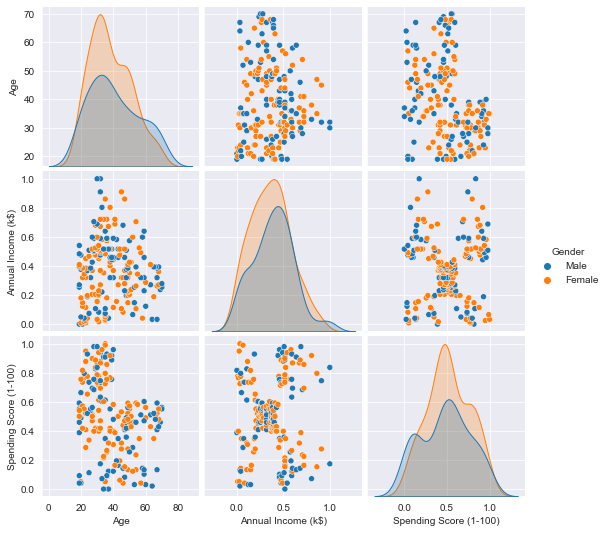

In [32]:
sns.pairplot(dat.dropna(),hue='Gender')

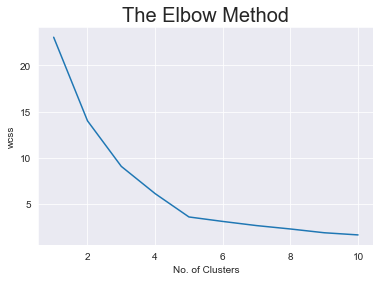

In [33]:
# kmean clustering with numerical data
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(dat[numerical_features])
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    

In [35]:
km.fit((dat[numerical_features]))
km.fit_predict(dat[numerical_features])
kmss=silhouette_score(dat[numerical_features],km.labels_,metric='euclidean')

In [36]:
print(kmss)

0.5594854531357838


In [37]:
#the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k.

#A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances

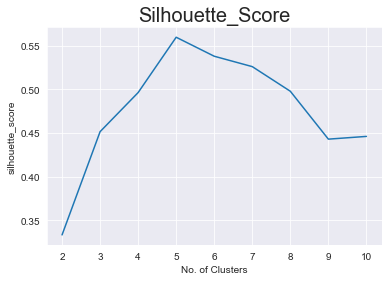

In [38]:
from sklearn.metrics import silhouette_score,silhouette_samples

silhouettess = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit((dat[numerical_features]))
    km.fit_predict(dat[numerical_features])
    silhouette=silhouette_score(dat[numerical_features],km.labels_,metric='euclidean')
    silhouettess.append(silhouette)
    
plt.plot(range(2, 11), silhouettess)
plt.title('Silhouette_Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.3334020547986479
For n_clusters = 3 The average silhouette_score is : 0.45149093095396486
For n_clusters = 4 The average silhouette_score is : 0.49620078746385005
For n_clusters = 5 The average silhouette_score is : 0.5594854531357838
For n_clusters = 6 The average silhouette_score is : 0.5354954062760995
For n_clusters = 7 The average silhouette_score is : 0.5168021892370785
For n_clusters = 8 The average silhouette_score is : 0.43614220455536923
For n_clusters = 9 The average silhouette_score is : 0.4416331298540267
For n_clusters = 10 The average silhouette_score is : 0.4460888498982396


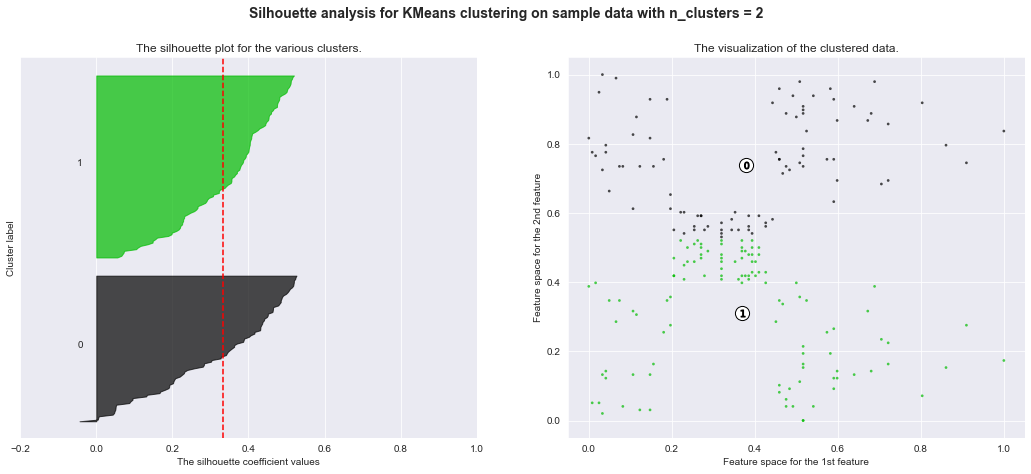

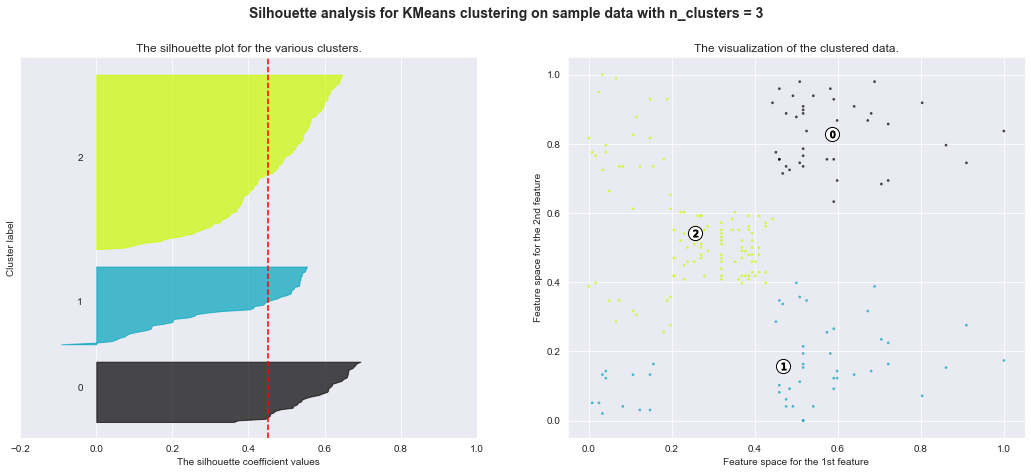

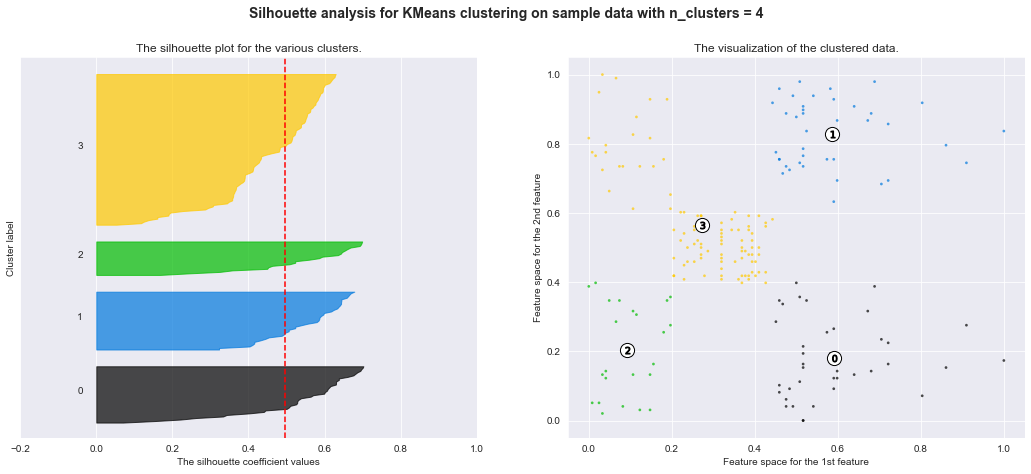

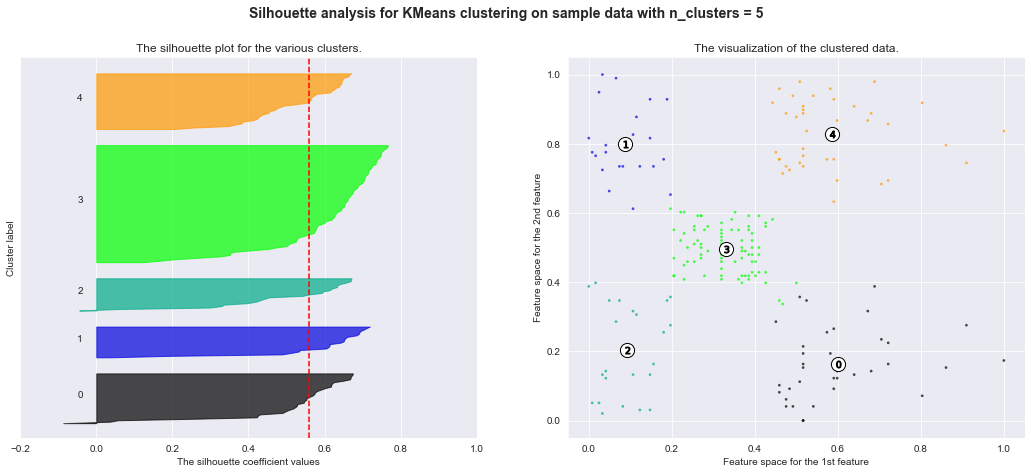

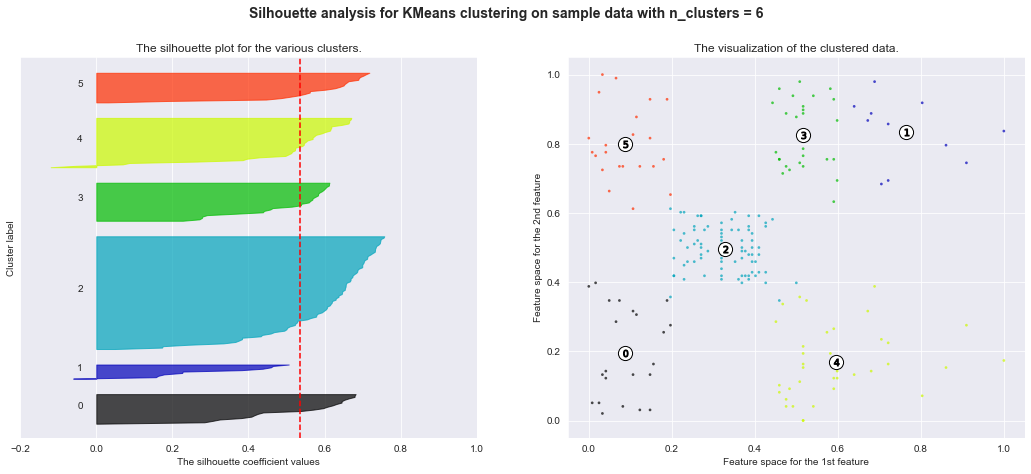

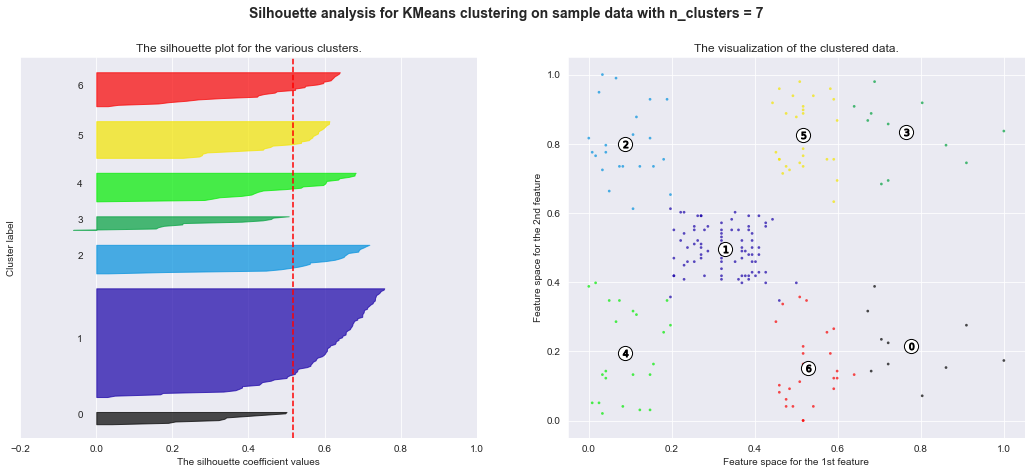

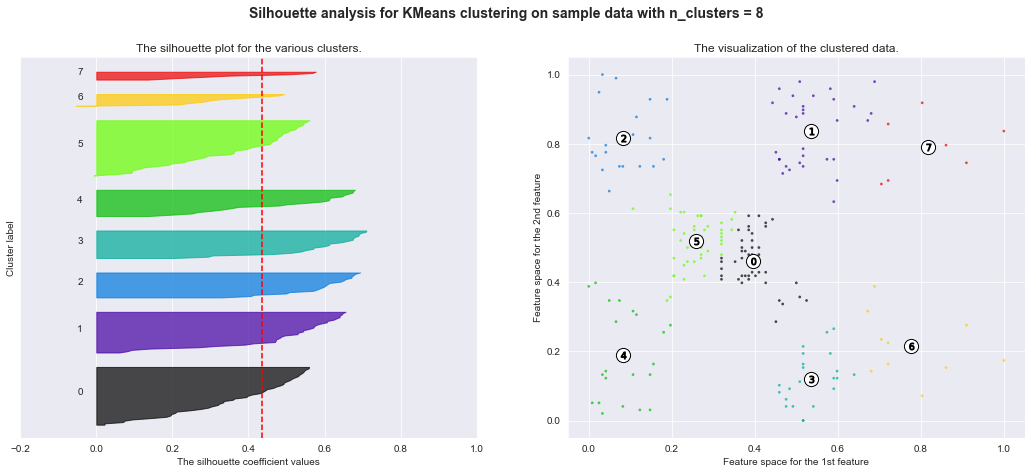

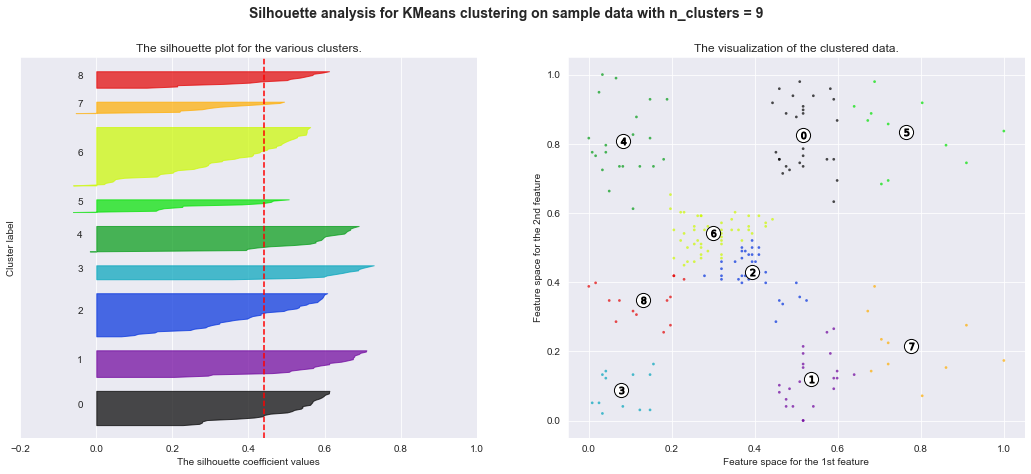

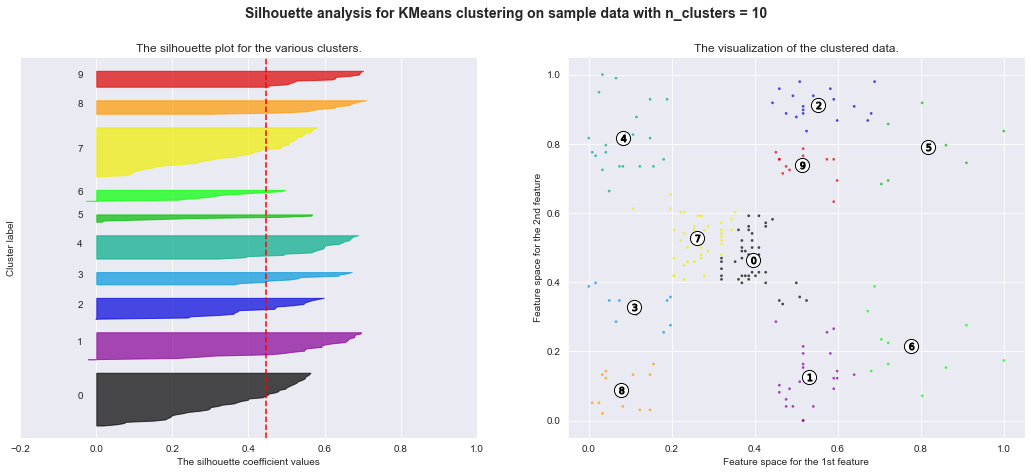

In [39]:
import matplotlib.cm as cm
X=dat[numerical_features]
#X=pd.DataFrame(data.drop(['Age'], axis=1))
for n_clusters in range(2, 11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    # But in this case, we have only [0,-1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [40]:
numerical_features=['Age','Annual Income (k$)','Spending Score (1-100)']
#Standdard Scaling
df[numerical_features]=MinMaxScaler().fit_transform(df[numerical_features])
#drop data
dat = pd.DataFrame(df.drop(['CustomerID'], axis=1))
print(dat)

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0      Male  0.019231            0.000000                0.387755
1      Male  0.057692            0.000000                0.816327
2    Female  0.038462            0.008197                0.051020
3    Female  0.096154            0.008197                0.775510
4    Female  0.250000            0.016393                0.397959
..      ...       ...                 ...                     ...
195  Female  0.326923            0.860656                0.795918
196  Female  0.519231            0.909836                0.275510
197    Male  0.269231            0.909836                0.744898
198    Male  0.269231            1.000000                0.173469
199    Male  0.230769            1.000000                0.836735

[200 rows x 4 columns]


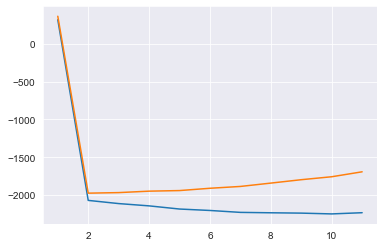

In [41]:

from sklearn.mixture import GaussianMixture

bic = []
aic = []
dat['Gender'].replace('Male',1,inplace=True)
dat['Gender'].replace('Female',0,inplace=True)
dat
for i in range(11):
    gm = GaussianMixture(n_components = i+1,n_init = 10,max_iter = 100)
    gm.fit(dat)
    bic.append(gm.bic(dat))
    aic.append(gm.aic(dat))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,10,11], aic,label = 'aic')
plt.plot([1,2,3,4,5,6,7,8,9,10,11], bic, label = 'bic')
plt.show()



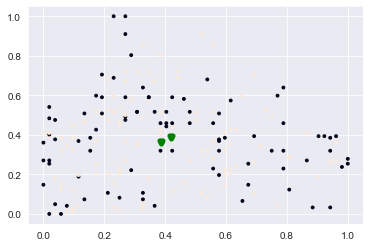

In [42]:
#As the BIC value is lowest at cluster 2, we will use our Gaussian Mixture with 2 clusters.

#Gaussian Mixture Model

model = GaussianMixture(n_components=2)
model.fit(dat)
g_pred = model.predict(dat)
g_pred
plt.scatter(dat.iloc[:,1], dat.iloc[:,2], c=g_pred,s=8)
plt.scatter(model.means_[:, 1], model.means_[:, 2],marker='v',s=10,linewidths=5,color='green')
plt.show()



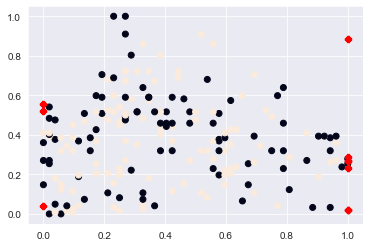

In [43]:
#Anomalies:
densities = model.score_samples(dat)
densities

density_threshold = np.percentile(densities,5)
density_threshold

anomalies = dat[densities < density_threshold]
anomalies
anomalies.shape

fig1 = plt.figure()
plt.scatter(dat.iloc[:, 1], dat.iloc[:, 2], c = g_pred)
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1],
            marker='x',
            s=20,
            linewidths=5,      
            color='red'
            )



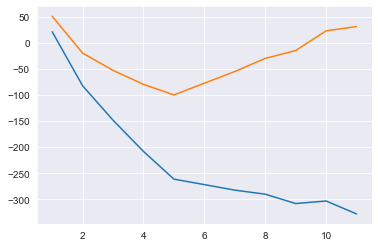

In [44]:
#Skipping the Gender Column.

from sklearn.mixture import GaussianMixture

bic1 = []
aic1 = []

for i in range(11):
    gm1 = GaussianMixture(n_components = i+1,n_init = 10,max_iter = 100)
    gm1.fit(dat[numerical_features])
    bic1.append(gm1.bic(dat[numerical_features]))
    aic1.append(gm1.aic(dat[numerical_features]))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,10,11], aic1,label = 'aic')
plt.plot([1,2,3,4,5,6,7,8,9,10,11], bic1, label = 'bic')
plt.show()

#As the BIC value is lowest at cluster 5, we will use our Gaussian Mixture with 5 clusters.



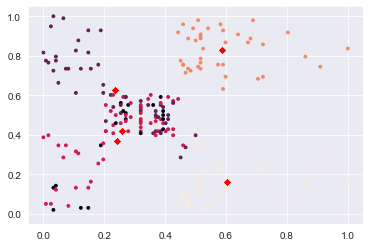

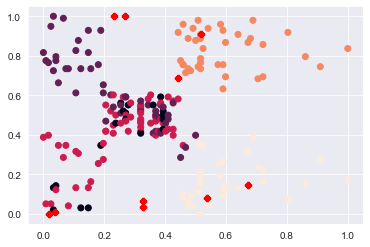

In [45]:
#Gaussian Mixture Model

model1 = GaussianMixture(n_components=5)
model1.fit(dat[numerical_features])
g_pred1 = model1.predict(dat[numerical_features])
g_pred1
plt.scatter(dat[numerical_features].iloc[:,1], dat[numerical_features].iloc[:,2],s=8,c=g_pred1)
plt.scatter(model1.means_[:, 1], model1.means_[:, 2],marker='x',s=10,linewidths=5,color='red')
plt.show()

#Anomalies:
densities1 = model1.score_samples(dat[numerical_features])
densities1

density_threshold1 = np.percentile(densities1,5)
density_threshold1

anomalies1 = dat[numerical_features][densities1 < density_threshold1]
anomalies1
anomalies1.shape

fig2 = plt.figure()
plt.scatter(dat[numerical_features].iloc[:, 1], dat[numerical_features].iloc[:, 2], c = g_pred1)
plt.scatter(anomalies1.iloc[:, 0], anomalies1.iloc[:, 1],
            marker='x',
            s=20,
            linewidths=5,      
            color='red'
            )

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import quadprog

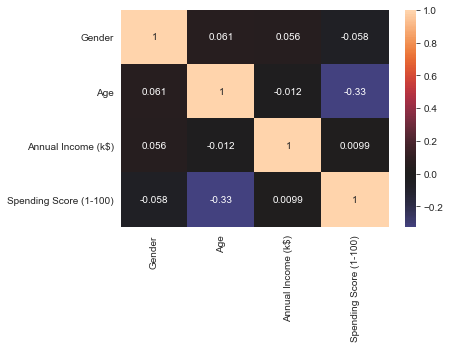

In [47]:
ax = sns.heatmap(dat.corr(), annot=True, center = 0)

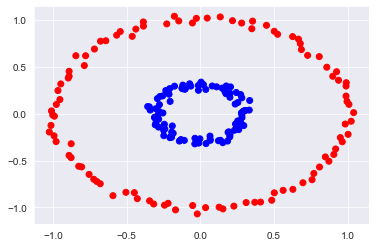

In [48]:
from sklearn import datasets
from sklearn import decomposition
X, y = datasets.make_circles(n_samples=200, factor=.3,noise=0.025)

#KPCA = decomposition.KernelPCA(kernel="rbf", fit_inverse_transform=True, n_components = 10, gamma=10).fit(X)
#X_PCA = 0.1*KPCA.transform(X)

plt.scatter(X[:,0],X[:,1],c=list(map(lambda x:'b' if x == 1 else 'r',y)))
plt.show()
#plt.scatter(X_PCA[:,0],X_PCA[:,1],c=list(map(lambda x:'b' if x == 1 else 'r',y)))
#plt.show()

In [49]:
def mercerK(x_i,x_j):
    q = 5
    return 0.1*np.exp(-q*np.square(np.linalg.norm(x_i-x_j)))

n = len(X)
d = len(X.T)
C = 1
K = np.zeros((n,n))

def quadprog_solve_qp(P, q, G=None, h=None, G2=None, h2=None, A=None, b=None):
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    if A is not None:
        qp_C = -np.vstack([A, G, G2]).T
        qp_b = -np.hstack([b, h, h2])
        meq = A.shape[0]
    else:
        qp_C = -np.vstack([G, G2]).T
        qp_b = -np.hstack([h, h2])
        meq = 0
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

for i in range(0,n):
    for j in range(0,n):
        if i >= j:
            k = mercerK(X[i], X[j])
            K[i,j] = k
            K[j,i] = k
            


#Q = np.concatenate((np.concatenate((K,-K),axis=1),np.concatenate((-K,K),axis=1)),axis = 0)
#r = np.concatenate((eps*np.ones(n)-y.T,eps*np.ones(n)+y.T),axis=1).reshape(-1)
#y_b = np.concatenate((np.ones(n).T,-np.ones(n).T),axis=0).reshape(-1)


Q = K + 0.00000000000001*np.identity(n)     
q = -K.diagonal()
G = -1*np.identity(n)
G2 = np.identity(n)
h = np.zeros(n)
h2 = C * np.ones(n)
b = np.zeros(n)
A = np.zeros((n,n))
A[0] = np.ones(n)

res = quadprog_solve_qp(Q, q, G=G, G2=G2, h=h, h2=h2,A=None, b=None)
print(np.sum((res >0) & (res < C)),np.sum((res==C)))
mask = (res >0) & (res < C)

102 0


In [50]:
points = np.zeros(n)
Kconst = 0
for t in range(0,n):
    if mask[t]:
        for s in range(0,n):
            if mask[s]:
                Kconst+=res[t]*res[s]*K[t,s]
def inside(x):
    x = x.reshape(-1,)
    point=mercerK(x,x) + Kconst
    for j in range(0,n):
        if mask[j]:
            point-=2*res[j]*mercerK(X[j],x)
    return point
for i in range(0,n):
    points[i] = inside(X[i])
r = points[mask].max()
mask_2 = points <= r
mask_3 = res==C
print(len(points[mask_2]))

200


In [ ]:
def adjacent(x_i,x_j):
    for i in range(0,19):
        v = x_i-x_j
        inner = ((i+1)/20) * v
        if inside(inner) > r:
            return 0
    return 1


inside_p = X[mask_2]
n_p=len(inside_p)
adj = np.zeros([n_p,n_p])
for i in range(0,n_p):
    #print(i)
    for j in range(0,n_p):
        if j>i:
            adj[i,j] = adjacent(inside_p[i],inside_p[j])
            adj[j,i] = adj[i,j]
        if j==i:
            adj[i,i] = 1.0
print(adj)

In [52]:
classified = {}
class_ = {}
grey = set()
def find_cluster(i):
    if i in grey:
        return
    if i not in class_:
        class_[i] = i
        classified[i] = set([i])
    for j in range(0,n_p):
        if adj[i,j]:
            class_[j] = class_[i]
            classified[class_[i]].add(j)
    grey.add(i)
    l_classified = classified[class_[i]].copy()
    for k in l_classified:
        find_cluster(k)
for i in range(0,n_p):
    find_cluster(i)
#print(classified)

In [53]:
clas = np.zeros(n)
c = 0
cl = 0
classes_2 = {}
print(np.sum(mask_2))
for i in range(0,n):
    if mask_2[i]:
        for k, v in classified.items():
            if c in set(v):
                if k not in classes_2:
                    cl += 1
                    classes_2[k] = cl
                clas[i] = classes_2[k]
    c+= 1
                
print(clas)

200
[1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1.
 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1.
 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2.
 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1.]


0 1 0


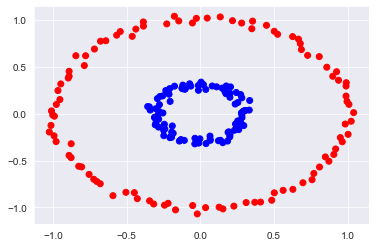

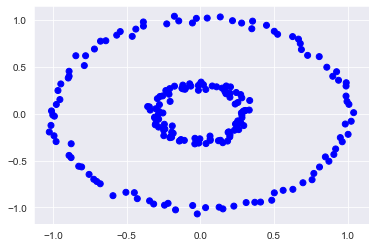

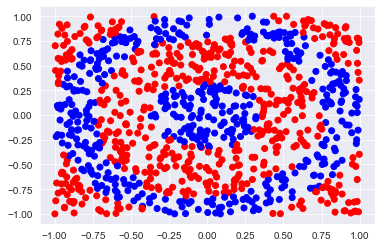

In [54]:
x = 2*np.random.rand(2,1000)-1


def color(c):
    if c == 0:
        return 'g'
    elif c == 1:
        return 'b'
    elif c == 2:
        return 'r'
    elif c == 3:
        return 'c'
    elif c == 4:
        return 'y'
    elif c == 5:
        return 'teal'
    else:
        return 'k'
def new_color(x):
    i = inside(x)
    if i <= r:
        return 'b'
    if i > r:
        return 'r'
    return 'g'

x_1 = np.zeros((3,2))
x_1[0][0] = -1
x_1[1][0] = -0.3

print(adjacent(x_1[0],x_1[1]),adjacent(x_1[1],x_1[2]),adjacent(x_1[0],x_1[2]))

plt.scatter(X[:,0],X[:,1],c=list(map(color,clas)))
plt.show()

plt.scatter(X[:,0],X[:,1],c=list(map(new_color,X)))
plt.show()

plt.scatter(x[0],x[1],c=list(map(new_color,x.T)))
plt.show()